# RED WINE QUALITY ANALYSIS

Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering,DBSCAN

Data collection and Analysis

In [2]:
data=pd.read_csv("winequality-red.csv")

In [3]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
data.shape

(1599, 12)

Data cleaning and preprocessing

In [6]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Exploratory Data Analysis

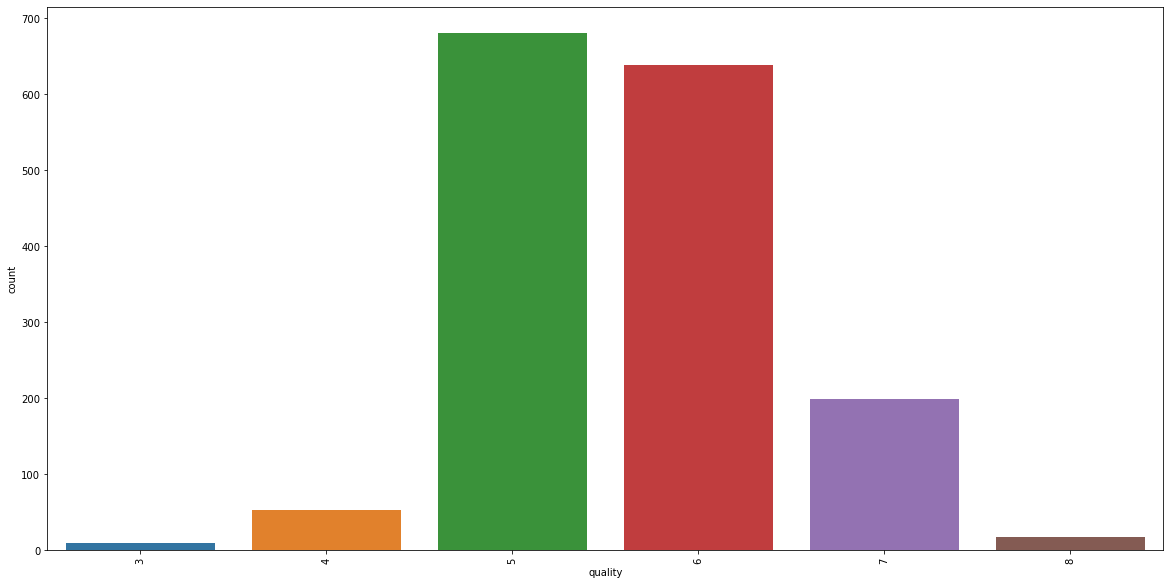

In [8]:
plt.figure(figsize=(20,10))
sns.countplot(data["quality"])
plt.xticks(rotation=90)
plt.show()

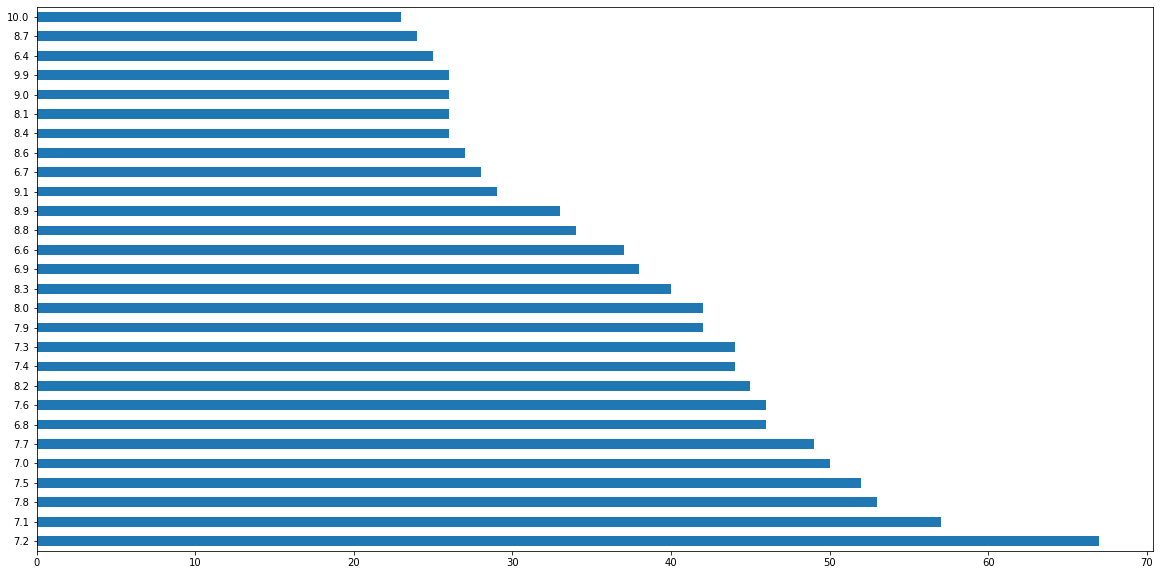

In [9]:
plt.figure(figsize=(20,10))
data["fixed acidity"].value_counts()[:10].plot.barh()
plt.show()

In [10]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

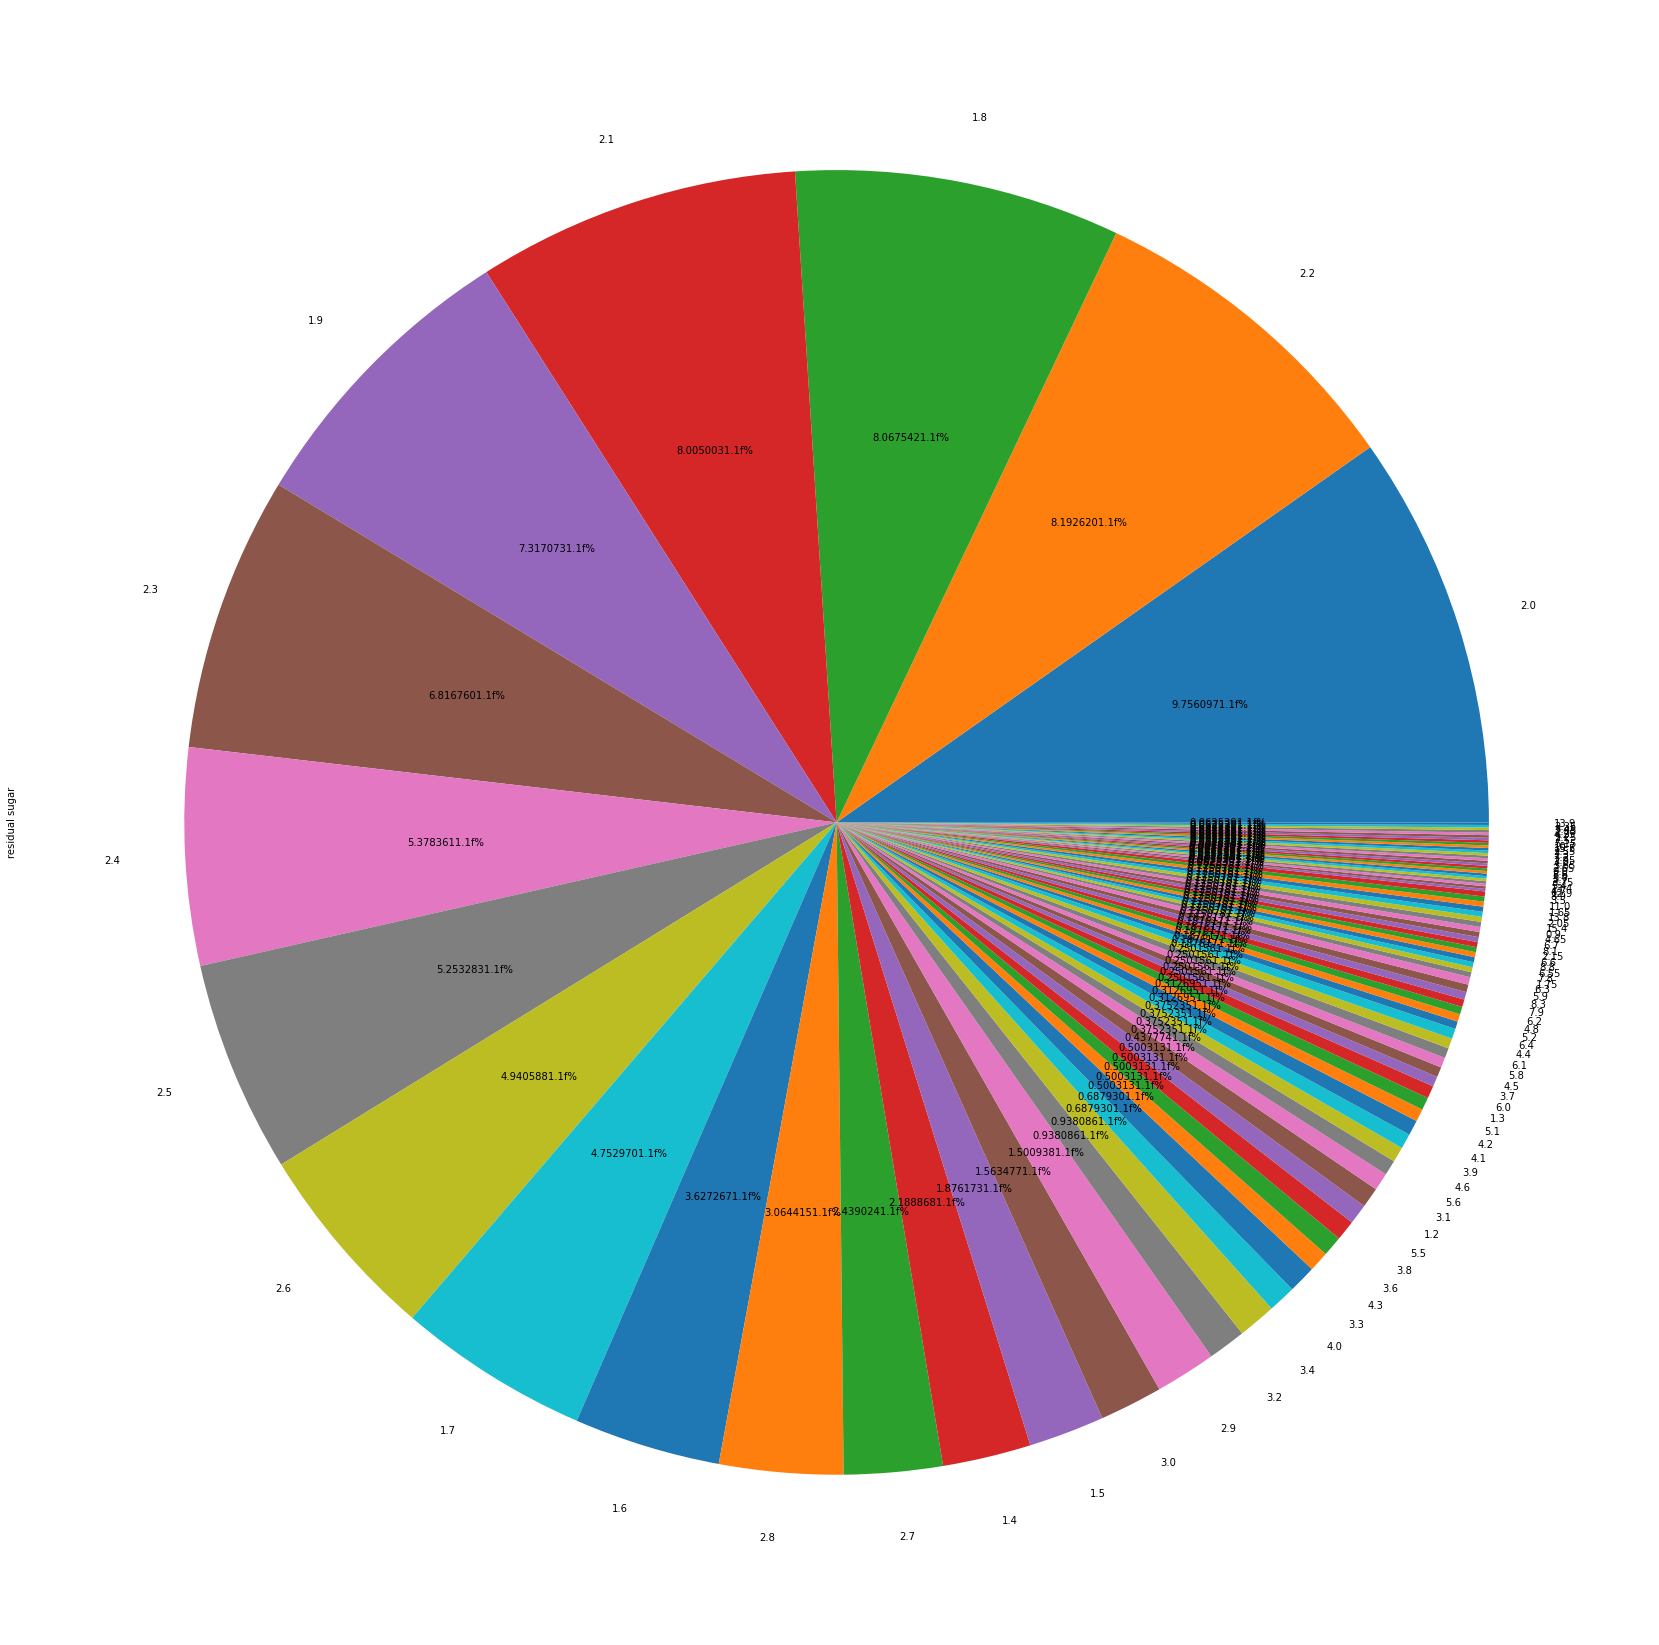

In [11]:
plt.figure(figsize=(30,30))
data["residual sugar"].value_counts().plot.pie(autopct="%f1.1f%%")
plt.show()

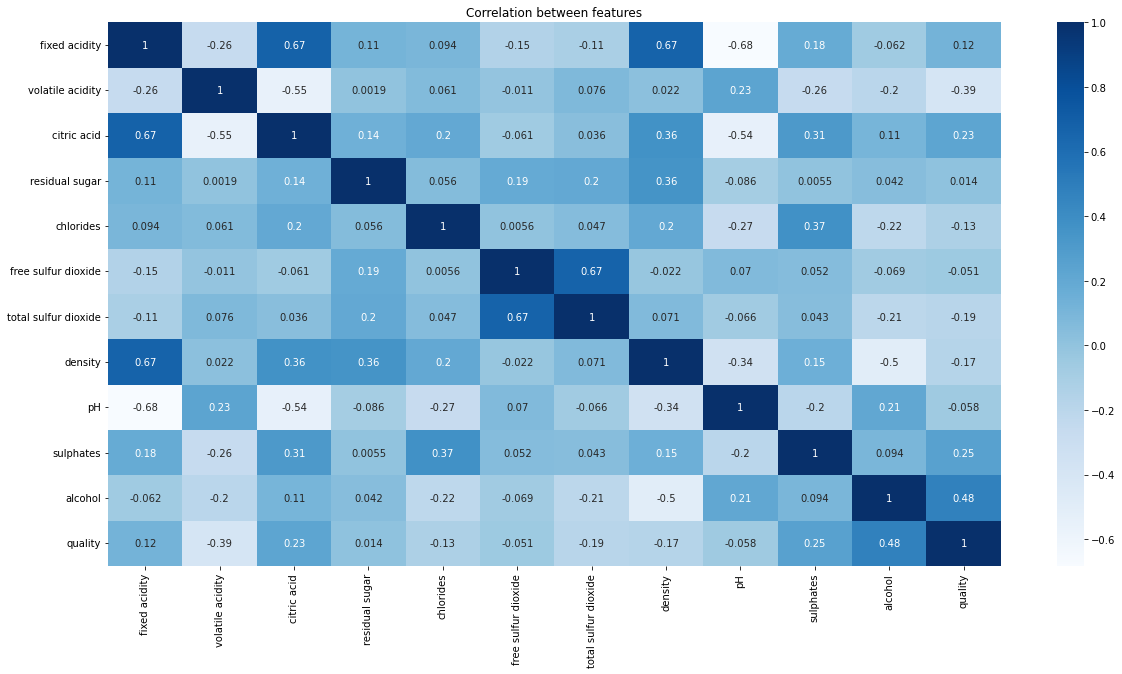

In [12]:
#correlation using heatmap
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap="Blues")
plt.title("Correlation between features")
plt.show()

In [13]:
#remove quality column
data=data.drop(["quality"],axis=1)

Apply WCSS to find the optimal number of clusters in Kmeans clustring

In [14]:
wcss=[]
for i in range(1,10):
    km=KMeans(n_clusters=i, init="k-means++", n_init=10, random_state=42)
    km.fit(data)
    y_km=km.predict(data)
    wcss.append(km.inertia_)
print(wcss)

[1914079.6278043413, 691909.8671253184, 395285.69613265194, 283158.4799352656, 221154.4579049109, 177331.60966002158, 149940.3119545435, 132967.31903060857, 116677.37227876319]


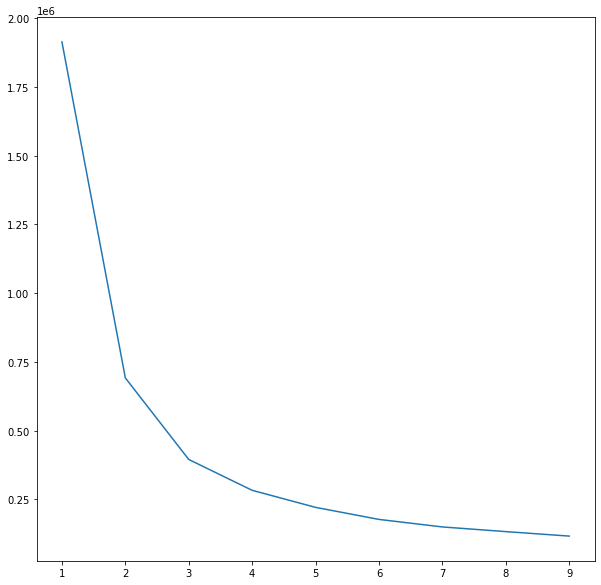

In [15]:
plt.figure(figsize=(10,10))
plt.plot(range(1,10),wcss)
plt.show()

In [16]:
#optimal k value can be 3 or 4. To select the optimal value we can use k elbow visualiser from yellow brick library

In [17]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


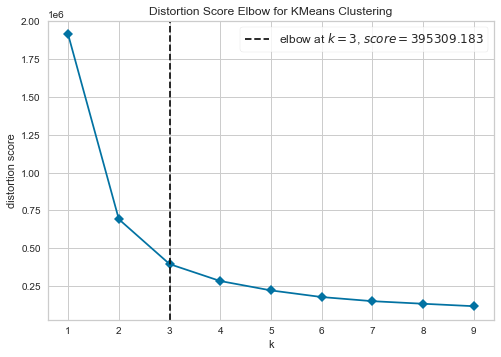

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
from yellowbrick.cluster import KElbowVisualizer
model=KMeans()
visualizer=KElbowVisualizer(model, k=(1,10), timings=False)
visualizer.fit(data)
visualizer.show()

for cluster: 3, the silhoutte score is: 0.5209776312111326
for cluster: 4, the silhoutte score is: 0.48971967046233833
for cluster: 5, the silhoutte score is: 0.44605984677529914
for cluster: 6, the silhoutte score is: 0.44850222651946337
for cluster: 7, the silhoutte score is: 0.3940373555812897
for cluster: 8, the silhoutte score is: 0.39148437074624515
for cluster: 9, the silhoutte score is: 0.3863394320160525


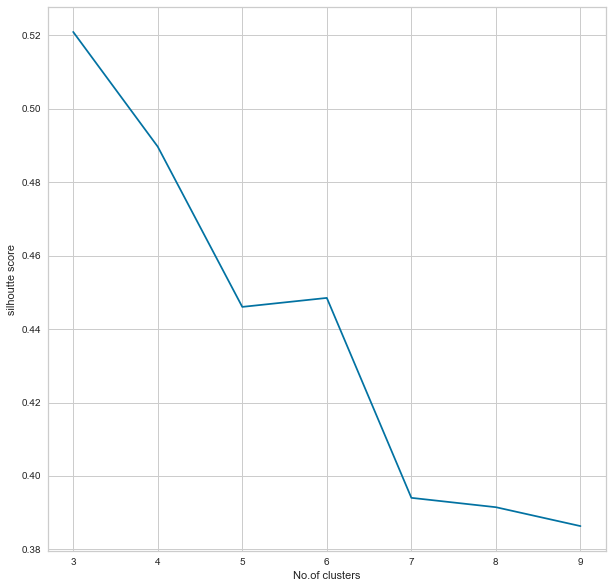

In [19]:
#Finding no of clusters using silhoutte score
sil=[ ]
for i in range(3,10):
    km=KMeans(n_clusters=i,max_iter=100)
    km.fit(data)
    score=silhouette_score(data,km.labels_)
    print("for cluster: {}, the silhoutte score is: {}". format(i,score))
    sil.append(score)
plt.figure(figsize=(10,10))
plt.plot(range(3,10),sil)
plt.xlabel("No.of clusters")
plt.ylabel("silhoutte score")
plt.show()

In [20]:
#From both WCSS and Silhoutte score method we found that the optimal value of number of clusters is 3

In [29]:
#PCA
from sklearn.decomposition import PCA
pca=PCA()
X=pca.fit_transform(data)

In [30]:
#Build Kmeans model
km=KMeans(n_clusters=3,init="k-means++",n_init=10, random_state=42)
label=km.fit_predict(X)
unique_labels=np.unique(label)

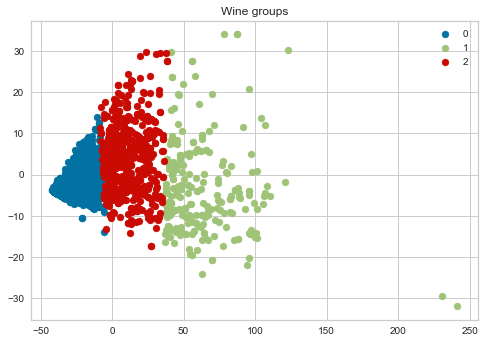

In [31]:
#visualise the clusters
for i in unique_labels:
    plt.scatter(X[label==i,0],X[label==i,1],label=i)
plt.legend()
plt.title("Wine groups")
plt.show()